In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

2023-04-10 19:16:27.224801: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


In [3]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)


In [4]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)


In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  #tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')],
)

testing = model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test,
)


Epoch 1/10
469/469 [==============================] - 5s 4ms/step - loss: 0.2700 - accuracy: 0.9196 - val_loss: 0.1287 - val_accuracy: 0.9610
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1117 - accuracy: 0.9657 - val_loss: 0.1154 - val_accuracy: 0.9652
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0760 - accuracy: 0.9775 - val_loss: 0.0986 - val_accuracy: 0.9705
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0553 - accuracy: 0.9828 - val_loss: 0.0977 - val_accuracy: 0.9720
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0419 - accuracy: 0.9870 - val_loss: 0.0980 - val_accuracy: 0.9733
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0336 - accuracy: 0.9893 - val_loss: 0.0924 - val_accuracy: 0.9753
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0264 - accuracy: 0.9920 - val_loss: 0.1005 - val_accuracy: 0.9734
Epoch 

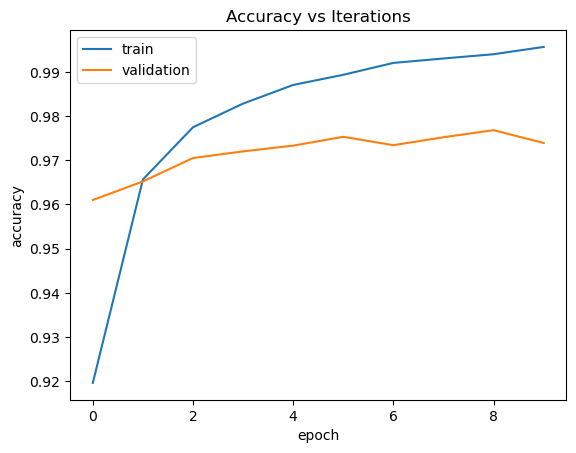

In [6]:
plt.plot(testing.history['accuracy'])
plt.plot(testing.history['val_accuracy'])
plt.title('Accuracy vs Iterations')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


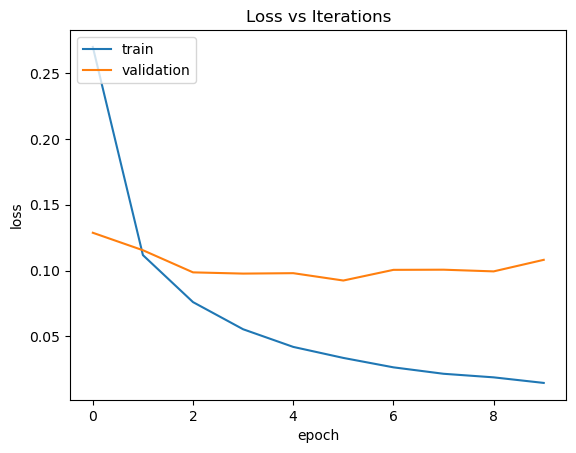

In [7]:
plt.plot(testing.history['loss'])
plt.plot(testing.history['val_loss'])
plt.title('Loss vs Iterations')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [8]:
model.evaluate(ds_test)


79/79 [==============================] - 0s 2ms/step - loss: 0.1081 - accuracy: 0.9739


[0.10812117904424667, 0.9739000201225281]